# Visualizations

# Working Data

In [21]:
import pandas as pd

pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

price = new_pumpkins.Price
month = new_pumpkins.Month

# Matplotlib

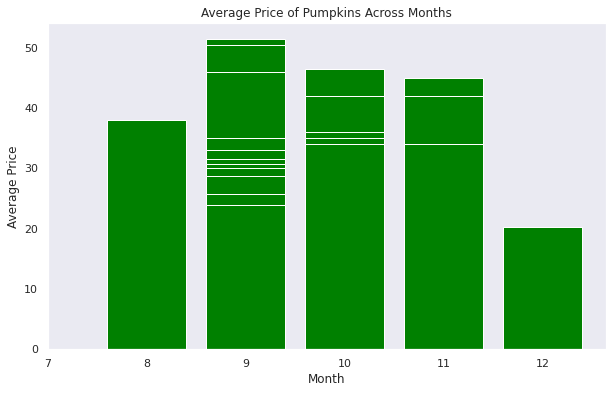

In [22]:
import matplotlib.pyplot as plt

# Bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(new_pumpkins['Month'], new_pumpkins['Price'], color='green')
plt.title('Average Price of Pumpkins Across Months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(7, 13))  # Assuming months are represented by integers 1 to 12
plt.show()

# Seaborn

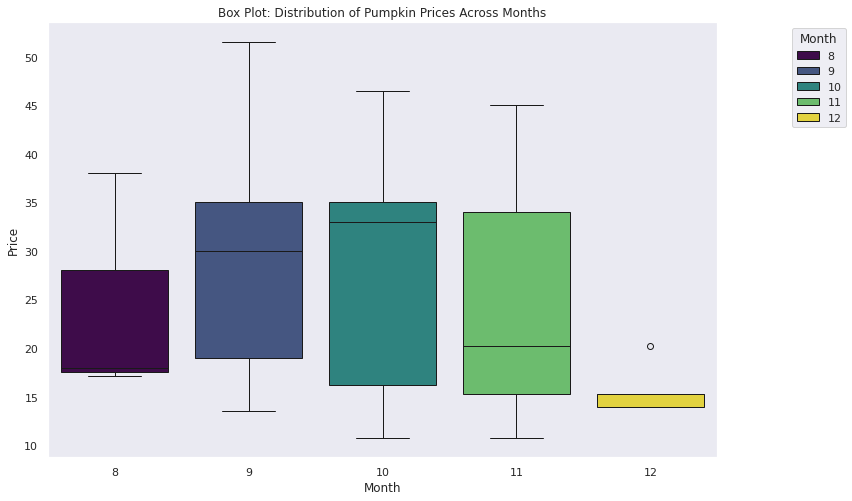

In [23]:
import seaborn as sns

# Set the style for Seaborn
sns.set(style="dark")

# Box plot using Seaborn with hue
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='Price', data=new_pumpkins, hue='Month', palette='viridis', dodge=False) # 'dodge' compacts boxes
plt.title('Box Plot: Distribution of Pumpkin Prices Across Months')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(title='Month', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()